In [4]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set Seaborn style for cleaner plots
sns.set(style='whitegrid')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/cleaned_real_estate_data.csv')

In [9]:
#divide the price ranges
df['price_segment'] = pd.cut(df['price_lakhs'],
                             bins=[0, 50, 100, df['price_lakhs'].max()],
                             labels=['Affordable', 'Mid-range', 'Luxury'])

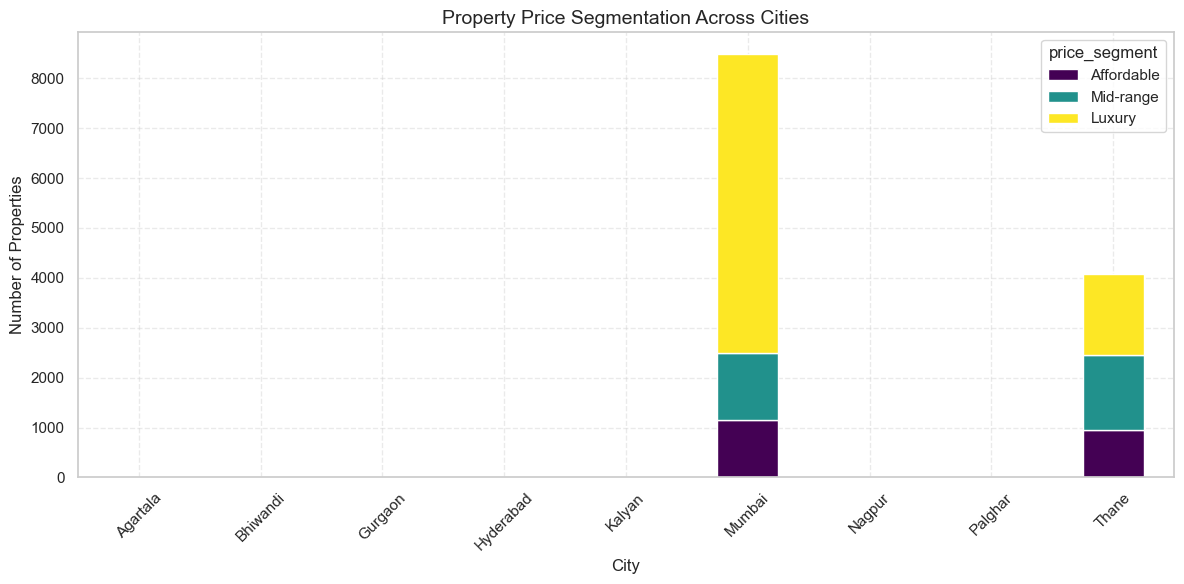

In [10]:
#distribution of price segmentation across cities
import matplotlib.pyplot as plt
import seaborn as sns

price_city_dist = df.groupby(['city', 'price_segment']).size().unstack().fillna(0)

price_city_dist.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Property Price Segmentation Across Cities', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

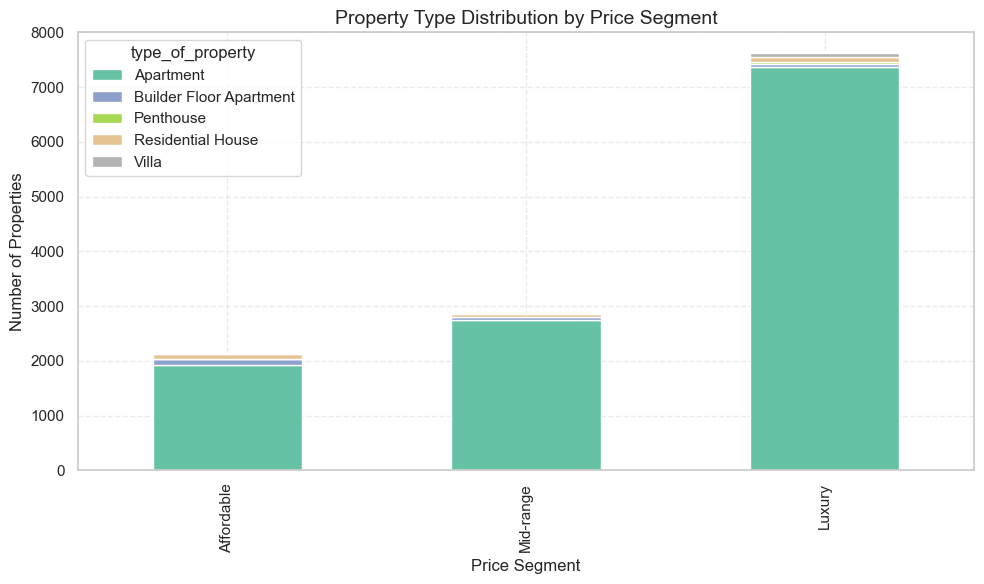

In [11]:
#property type distribution by price segment
type_segment_dist = df.groupby(['price_segment', 'type_of_property']).size().unstack().fillna(0)

type_segment_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Property Type Distribution by Price Segment', fontsize=14)
plt.xlabel('Price Segment', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [13]:
#amenity count summary by segment

amenity_summary = df.groupby('price_segment')['amenity_count'].agg(['mean', 'max', 'min']).round(2)
print("Amenity Summary by Price Segment:")
print(amenity_summary)

Amenity Summary by Price Segment:
                mean  max  min
price_segment                 
Affordable     12.02   29    0
Mid-range      15.38   29    0
Luxury         20.33   29    0


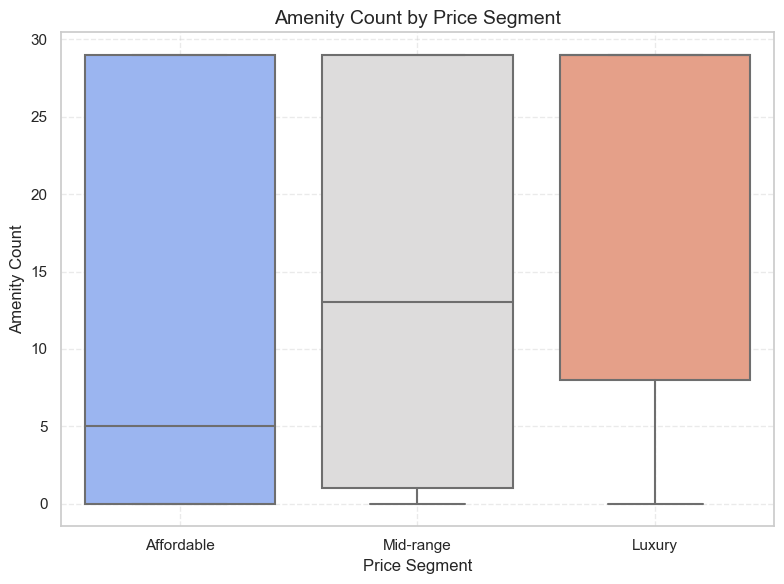

In [14]:
#box plot for above
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_segment', y='amenity_count', data=df, palette='coolwarm')
plt.title('Amenity Count by Price Segment', fontsize=14)
plt.xlabel('Price Segment', fontsize=12)
plt.ylabel('Amenity Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

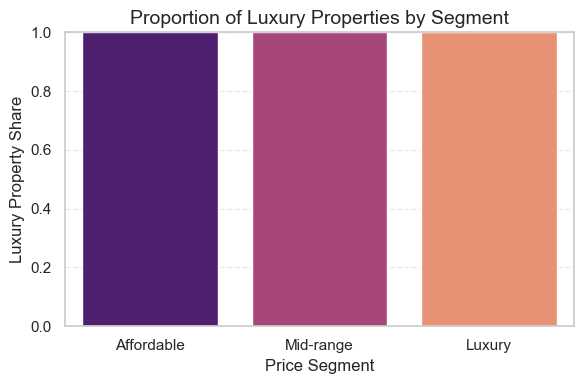

In [15]:
#luxury property proportyion by segment

luxury_dist = df.groupby('price_segment')['is_luxury'].mean().round(2).reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='price_segment', y='is_luxury', data=luxury_dist, palette='magma')
plt.title('Proportion of Luxury Properties by Segment', fontsize=14)
plt.ylabel('Luxury Property Share', fontsize=12)
plt.xlabel('Price Segment', fontsize=12)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

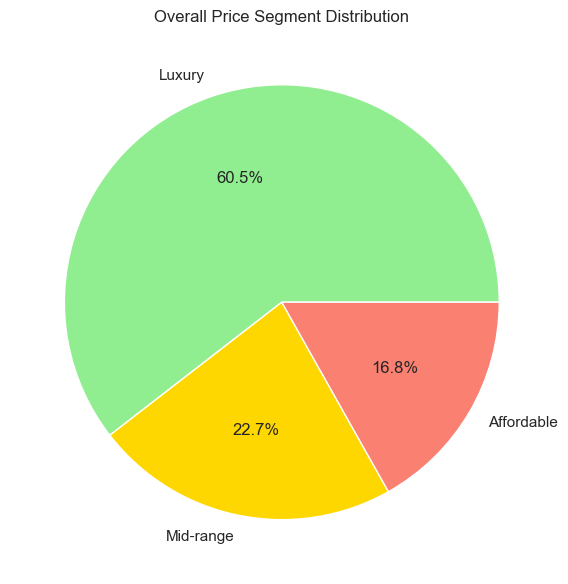

In [16]:
#overall segment distribution

segment_counts = df['price_segment'].value_counts()
segment_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), colors=['lightgreen', 'gold', 'salmon'])
plt.title('Overall Price Segment Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

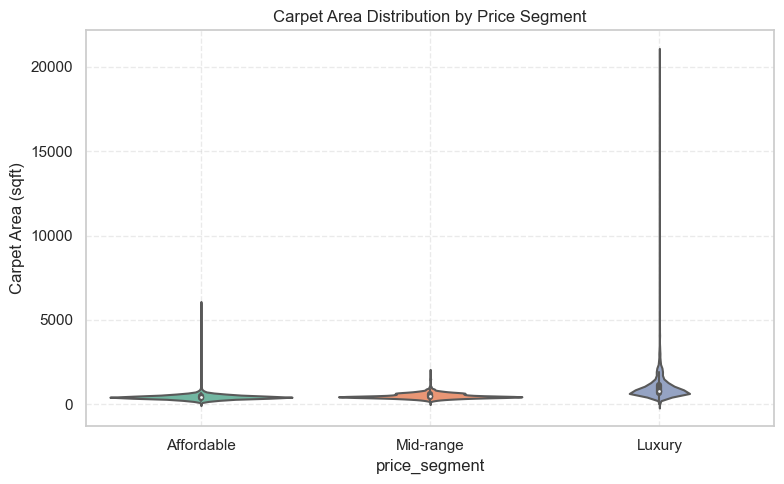

In [17]:
#Hidden insight 1: Luxury does not always mean larger carpet area

df['price_segment'] = pd.cut(df['price_lakhs'], bins=[0, 50, 100, df['price_lakhs'].max()],
                             labels=['Affordable', 'Mid-range', 'Luxury'])

carpet_by_segment = df.groupby(['city', 'price_segment'])['carpet_area'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.violinplot(x='price_segment', y='carpet_area', data=df, palette='Set2')
plt.title('Carpet Area Distribution by Price Segment')
plt.ylabel('Carpet Area (sqft)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

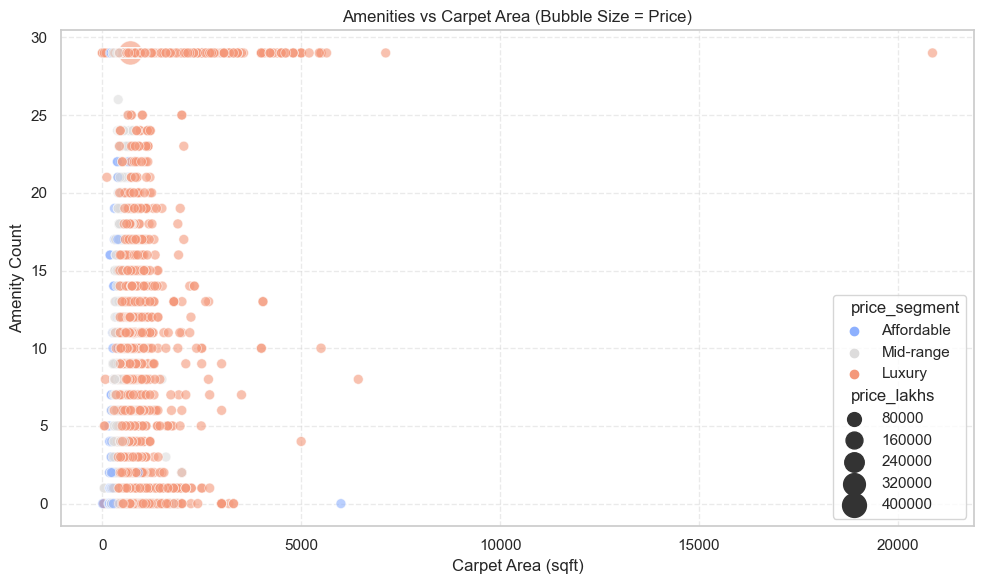

In [18]:
#amenities inflation in mid-range segment

amenity_by_segment = df.groupby(['city', 'price_segment'])['amenity_count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='carpet_area', y='amenity_count',
    hue='price_segment', size='price_lakhs',
    data=df, sizes=(50, 300), alpha=0.6, palette='coolwarm'
)
plt.title('Amenities vs Carpet Area (Bubble Size = Price)')
plt.xlabel('Carpet Area (sqft)')
plt.ylabel('Amenity Count')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()